In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
%matplotlib inline
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [6]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [7]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


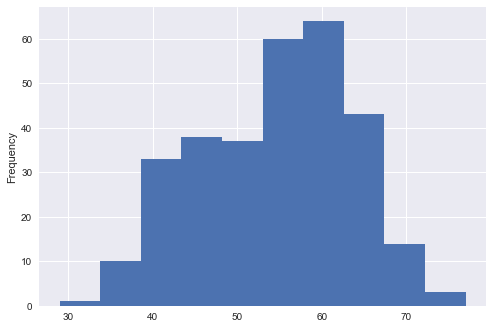

In [8]:
df.Age.plot.hist();

In [9]:
df_no_na = df.dropna()
df_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [10]:
for c in df_no_na.columns:
    print(f'{c} ({df_no_na[c].dtype}): {df_no_na[c].unique()}\n')

Age (int64): [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]

Sex (int64): [1 0]

ChestPain (object): ['typical' 'asymptomatic' 'nonanginal' 'nontypical']

RestBP (int64): [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]

Chol (int64): [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 160 394 184 315 409 244 195 196 126 313 259 200 262
 215 228 193 271 210

In [11]:
df_no_na.AHD.replace(['No', 'Yes'], [0, 1], inplace = True)
df_no_na.AHD.dtype, df_no_na.AHD.unique()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


(dtype('int64'), array([0, 1]))

In [12]:
scaler = MinMaxScaler()
col = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']
df_no_na[col] = scaler.fit_transform(df_no_na[col])
df_no_na.describe()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.532127,0.676768,0.355600,0.277055,0.144781,0.996633,0.599995,0.326599,0.170251,1.602694,0.676768,0.461279
std,0.188536,0.468500,0.167574,0.118716,0.352474,0.994914,0.175126,0.469761,0.188084,0.618187,0.938965,0.499340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.395833,0.000000,0.245283,0.194064,0.000000,0.000000,0.473282,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.562500,1.000000,0.339623,0.267123,0.000000,1.000000,0.625954,0.000000,0.129032,2.000000,0.000000,0.000000
75%,0.666667,1.000000,0.433962,0.342466,0.000000,2.000000,0.725191,1.000000,0.258065,2.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000


In [13]:
def make_cat_col(df, col):
    df[col+'_cat'] = df[col].astype('category').cat.codes
    df.drop(col, axis = 1, inplace = True)
    return df

df_no_na = make_cat_col(df_no_na, 'ChestPain')
df_no_na = make_cat_col(df_no_na, 'Thal')
df_no_na.head()

<ipython-input-13-ff0b08aa72b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col+'_cat'] = df[col].astype('category').cat.codes
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_cat,Thal_cat
0,0.708333,1,0.481132,0.244292,1,2,0.603053,0,0.370968,3,0.0,0,3,0
1,0.791667,1,0.622642,0.365297,0,2,0.282443,1,0.241935,2,3.0,1,0,1
2,0.791667,1,0.245283,0.235160,0,2,0.442748,1,0.419355,2,2.0,1,0,2
3,0.166667,1,0.339623,0.283105,0,0,0.885496,0,0.564516,3,0.0,0,1,1
4,0.250000,0,0.339623,0.178082,0,2,0.770992,0,0.225806,1,0.0,0,2,1


In [14]:
df_no_na.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_cat,Thal_cat
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.532127,0.676768,0.355600,0.277055,0.144781,0.996633,0.599995,0.326599,0.170251,1.602694,0.676768,0.461279,0.841751,1.326599
std,0.188536,0.468500,0.167574,0.118716,0.352474,0.994914,0.175126,0.469761,0.188084,0.618187,0.938965,0.499340,0.964859,0.585061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.245283,0.194064,0.000000,0.000000,0.473282,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.562500,1.000000,0.339623,0.267123,0.000000,1.000000,0.625954,0.000000,0.129032,2.000000,0.000000,0.000000,1.000000,1.000000
75%,0.666667,1.000000,0.433962,0.342466,0.000000,2.000000,0.725191,1.000000,0.258065,2.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,3.000000,2.000000


In [15]:
X = df_no_na.drop('AHD', axis = 1)
y = df_no_na.AHD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Logistic Regression

In [16]:
model = LogisticRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.7833333333333333

In [17]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82        34
           1       0.78      0.69      0.73        26

    accuracy                           0.78        60
   macro avg       0.78      0.77      0.78        60
weighted avg       0.78      0.78      0.78        60



In [18]:
print(confusion_matrix(y_test, y_pred))

[[29  5]
 [ 8 18]]


In [19]:
(tn, fp), (fn, tp) = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp

(29, 5, 8, 18)

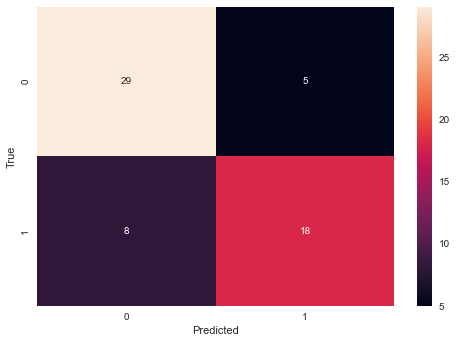

In [20]:
def plot_heatmap(y_test, y_pred):
    hmp = confusion_matrix(y_test, y_pred)
    sns.heatmap(hmp, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('True');

plot_heatmap(y_test, y_pred)